In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Splitting & Normalization Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data skripsi/df_lq45_fix.csv')

In [ ]:
df

,date,open,high,low,close,sentiment_score
0,2020-01-02 00:00:00+07:00,1017.159973,1017.520020,1007.500000,1011.619995,-0.37530
1,2020-01-03 00:00:00+07:00,1016.719971,1021.489990,1012.969971,1021.489990,0.77830
2,2020-01-06 00:00:00+07:00,1012.929993,1016.159973,1005.830017,1010.229980,-0.78450
3,2020-01-07 00:00:00+07:00,1013.780029,1016.530029,1008.489990,1014.640015,0.76500
4,2020-01-08 00:00:00+07:00,1007.099976,1010.440002,1004.099976,1005.450012,-0.12060
...,...,...,...,...,...,...
991,2024-01-25 00:00:00+07:00,963.450012,971.130005,959.200012,959.799988,0.49390
992,2024-01-26 00:00:00+07:00,954.159973,957.119995,945.039978,951.489990,0.11908
993,2024-01-29 00:00:00+07:00,953.669983,961.919983,952.359985,961.919983,0.36010
994,2024-01-30 00:00:00+07:00,959.659973,975.229980,957.270020,971.700012,0.49390


In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.tz_convert('Asia/Jakarta')

In [ ]:
# Without News

df_scaler = df[['close']]

In [ ]:
df_scaler['target'] = df_scaler['close']

In [ ]:
df_scaler

,close,target
0,1011.619995,1011.619995
1,1021.489990,1021.489990
2,1010.229980,1010.229980
3,1014.640015,1014.640015
4,1005.450012,1005.450012
...,...,...
991,959.799988,959.799988
992,951.489990,951.489990
993,961.919983,961.919983
994,971.700012,971.700012


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_scaler, test_size=0.1, shuffle=False)
train_df, val_df = train_test_split(train_df, test_size=0.2, shuffle=False)

In [ ]:
print('length of train data: ', len(train_df))
print('length of validation data: ', len(val_df))
print('length of test data: ', len(test_df))

length of train data:  716
length of validation data:  180
length of test data:  100


In [ ]:
scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

In [ ]:
# Without News

x_train = train_df.copy()[['close']]
x_train = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train, columns=['close'])
x_train

,close
0,0.857658
1,0.876690
2,0.854978
3,0.863481
4,0.845761
...,...
711,0.826035
712,0.851218
713,0.827462
714,0.815179


In [ ]:
# Without News

x_val = val_df.copy()[['close']]
x_val = scaler.transform(x_val)

x_val = pd.DataFrame(x_val, columns=['close'])
x_val

,close
0,0.761671
1,0.730318
2,0.727695
3,0.706080
4,0.717148
...,...
175,0.771543
176,0.777251
177,0.774840
178,0.771987


In [ ]:
# Without News

x_test = test_df.copy()[['close']]
x_test = scaler.transform(x_test)

x_test = pd.DataFrame(x_test, columns=['close'])
x_test

,close
0,0.743430
1,0.755655
2,0.745512
3,0.746997
4,0.749658
...,...
95,0.757737
96,0.741713
97,0.761825
98,0.780683


In [ ]:
y_train = train_df.copy()['target'].values
y_train = target_scaler.fit_transform(y_train.reshape(-1,1))

y_train = pd.DataFrame(y_train, columns=['target'])
y_train

,target
0,0.857658
1,0.876690
2,0.854978
3,0.863481
4,0.845761
...,...
711,0.826035
712,0.851218
713,0.827462
714,0.815179


In [ ]:
y_val = val_df.copy()['target'].values
y_val = target_scaler.transform(y_val.reshape(-1,1))

y_val = pd.DataFrame(y_val, columns=['target'])
y_val

,target
0,0.761671
1,0.730318
2,0.727695
3,0.706080
4,0.717148
...,...
175,0.771543
176,0.777251
177,0.774840
178,0.771987


In [ ]:
y_test = test_df.copy()['target'].values
y_test = target_scaler.transform(y_test.reshape(-1,1))

y_test = pd.DataFrame(y_test, columns=['target'])
y_test

,target
0,0.743430
1,0.755655
2,0.745512
3,0.746997
4,0.749658
...,...
95,0.757737
96,0.741713
97,0.761825
98,0.780683


In [ ]:
train_df = pd.concat([x_train, y_train], axis=1)
val_df = pd.concat([x_val, y_val], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

# Create Window Data

In [ ]:
import tensorflow as tf

In [ ]:
train_df

,close,target
0,0.857658,0.857658
1,0.876690,0.876690
2,0.854978,0.854978
3,0.863481,0.863481
4,0.845761,0.845761
...,...,...
711,0.826035,0.826035
712,0.851218,0.851218
713,0.827462,0.827462
714,0.815179,0.815179


In [ ]:
# periode data train

df.date.iloc[0:716].describe()

count                                    716
mean     2021-06-21 03:35:11.731843584+07:00
min                2020-01-02 00:00:00+07:00
25%                2020-09-24 18:00:00+07:00
50%                2021-06-24 12:00:00+07:00
75%                2022-03-14 06:00:00+07:00
max                2022-12-05 00:00:00+07:00
Name: date, dtype: object

In [ ]:
val_df

,close,target
0,0.761671,0.761671
1,0.730318,0.730318
2,0.727695,0.727695
3,0.706080,0.706080
4,0.717148,0.717148
...,...,...
175,0.771543,0.771543
176,0.777251,0.777251
177,0.774840,0.774840
178,0.771987,0.771987


In [ ]:
# periode data val

df.date.iloc[716:896].describe()

count                                    180
mean     2023-04-20 13:19:59.999999744+07:00
min                2022-12-06 00:00:00+07:00
25%                2023-02-07 18:00:00+07:00
50%                2023-04-15 12:00:00+07:00
75%                2023-07-04 06:00:00+07:00
max                2023-09-07 00:00:00+07:00
Name: date, dtype: object

In [ ]:
test_df

,close,target
0,0.743430,0.743430
1,0.755655,0.755655
2,0.745512,0.745512
3,0.746997,0.746997
4,0.749658,0.749658
...,...,...
95,0.757737,0.757737
96,0.741713,0.741713
97,0.761825,0.761825
98,0.780683,0.780683


In [ ]:
# periode data test

df.date.iloc[896:].describe()

count                                    100
mean     2023-11-19 07:11:59.999999744+07:00
min                2023-09-08 00:00:00+07:00
25%                2023-10-15 06:00:00+07:00
50%                2023-11-18 12:00:00+07:00
75%                2023-12-23 06:00:00+07:00
max                2024-01-31 00:00:00+07:00
Name: date, dtype: object

In [ ]:
class DataWindow:

    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None, batch_size=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.batch_size = batch_size

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :-1]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=self.batch_size
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
      return self.make_dataset(self.test_df)

In [ ]:
data = DataWindow(input_width=5, label_width=1, shift=1, label_columns=['target'], batch_size=16)

In [ ]:
data_train = data.train
data_val = data.val
data_test = data.test

In [ ]:
for i, item in enumerate(data_train):
  if i < 5:
    print(item)
  else:
    break

(<tf.Tensor: shape=(16, 5, 1), dtype=float32, numpy=
array([[[0.857658  ],
        [0.8766897 ],
        [0.8549778 ],
        [0.86348134],
        [0.8457609 ]],

       [[0.8766897 ],
        [0.8549778 ],
        [0.86348134],
        [0.8457609 ],
        [0.86772346]],

       [[0.8549778 ],
        [0.86348134],
        [0.8457609 ],
        [0.86772346],
        [0.8699795 ]],

       [[0.86348134],
        [0.8457609 ],
        [0.86772346],
        [0.8699795 ],
        [0.88401705]],

       [[0.8457609 ],
        [0.86772346],
        [0.8699795 ],
        [0.88401705],
        [0.89757234]],

       [[0.86772346],
        [0.8699795 ],
        [0.88401705],
        [0.89757234],
        [0.88359267]],

       [[0.8699795 ],
        [0.88401705],
        [0.89757234],
        [0.88359267],
        [0.8850198 ]],

       [[0.88401705],
        [0.89757234],
        [0.88359267],
        [0.8850198 ],
        [0.8924048 ]],

       [[0.89757234],
        [0.88359267],
       

In [ ]:
for item in data_val:
  print(item)

(<tf.Tensor: shape=(16, 5, 1), dtype=float32, numpy=
array([[[0.76167077],
        [0.7303177 ],
        [0.7276952 ],
        [0.7060798 ],
        [0.7171478 ]],

       [[0.7303177 ],
        [0.7276952 ],
        [0.7060798 ],
        [0.7171478 ],
        [0.74422014]],

       [[0.7276952 ],
        [0.7060798 ],
        [0.7171478 ],
        [0.74422014],
        [0.7410771 ]],

       [[0.7060798 ],
        [0.7171478 ],
        [0.74422014],
        [0.7410771 ],
        [0.7241087 ]],

       [[0.7171478 ],
        [0.74422014],
        [0.7410771 ],
        [0.7241087 ],
        [0.74113506]],

       [[0.74422014],
        [0.7410771 ],
        [0.7241087 ],
        [0.74113506],
        [0.73276645]],

       [[0.7410771 ],
        [0.7241087 ],
        [0.74113506],
        [0.73276645],
        [0.7174371 ]],

       [[0.7241087 ],
        [0.74113506],
        [0.73276645],
        [0.7174371 ],
        [0.72275895]],

       [[0.74113506],
        [0.73276645],
       

In [ ]:
for item in data_test:
  print(item)

(<tf.Tensor: shape=(16, 5, 1), dtype=float32, numpy=
array([[[0.74342966],
        [0.7556546 ],
        [0.7455122 ],
        [0.7469968 ],
        [0.7496578 ]],

       [[0.7556546 ],
        [0.7455122 ],
        [0.7469968 ],
        [0.7496578 ],
        [0.76043665]],

       [[0.7455122 ],
        [0.7469968 ],
        [0.7496578 ],
        [0.76043665],
        [0.7501205 ]],

       [[0.7469968 ],
        [0.7496578 ],
        [0.76043665],
        [0.7501205 ],
        [0.767841  ]],

       [[0.7496578 ],
        [0.76043665],
        [0.7501205 ],
        [0.767841  ],
        [0.7782342 ]],

       [[0.76043665],
        [0.7501205 ],
        [0.767841  ],
        [0.7782342 ],
        [0.77096474]],

       [[0.7501205 ],
        [0.767841  ],
        [0.7782342 ],
        [0.77096474],
        [0.77383786]],

       [[0.767841  ],
        [0.7782342 ],
        [0.77096474],
        [0.77383786],
        [0.7631554 ]],

       [[0.7782342 ],
        [0.77096474],
       

# Modeling without News

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(5, 1)))
model.add(Dropout(0.0))
model.add(Dense(1))

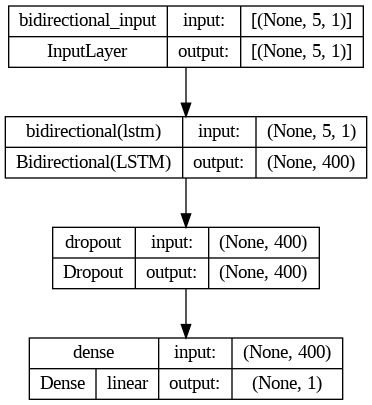

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 400)               323200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 323601 (1.23 MB)
Trainable params: 323601 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Manual processing

In [ ]:
print(model.get_weight_paths())

{'bidirectional.forward_layer.cell.kernel': <tf.Variable 'bidirectional/forward_lstm/lstm_cell/kernel:0' shape=(1, 800) dtype=float32, numpy=
array([[ 1.38776228e-02,  6.45263493e-03, -1.24622583e-02,
        -2.68254802e-02, -3.64374593e-02, -4.37187031e-02,
         6.52406216e-02, -7.88500011e-02,  2.66525596e-02,
        -4.60379906e-02, -1.46921575e-02, -1.47877559e-02,
        -2.15367898e-02, -6.62920401e-02, -8.58210698e-02,
         7.94006586e-02,  8.12576115e-02,  5.02652228e-02,
        -2.96941437e-02,  2.78401077e-02, -2.05063820e-03,
         1.19132921e-02, -4.28434610e-02, -4.95303832e-02,
         3.11531126e-03,  3.03931087e-02, -1.35392323e-02,
        -3.08231339e-02,  8.59142840e-03, -6.00983500e-02,
         1.58873647e-02, -4.77226749e-02,  7.35108405e-02,
         5.91838956e-02,  1.06185004e-02,  8.01049620e-02,
         2.68240571e-02, -7.81429932e-02, -2.97196284e-02,
         7.13616759e-02, -4.11872715e-02,  2.68809050e-02,
         1.36845633e-02,  2.6816

In [ ]:
len(model.get_weight_paths())

8

In [ ]:
# Take parameter in layer BILSTM

W_forward = model.layers[0].get_weights()[0]
U_forward = model.layers[0].get_weights()[1]
b_forward = model.layers[0].get_weights()[2]

W_backward = model.layers[0].get_weights()[3]
U_backward = model.layers[0].get_weights()[4]
b_backward = model.layers[0].get_weights()[5]

# Take parameter in FC 1 layer

W_fc = model.layers[2].get_weights()[0]
b_fc = model.layers[2].get_weights()[1]

In [ ]:
units = 200 # must same like BILSTM units

##################### FORWARD #########################################

W_i_forward = W_forward[:, :units]
W_f_forward = W_forward[:, units: units * 2]
W_c_forward = W_forward[:, units * 2: units * 3]
W_o_forward = W_forward[:, units * 3:]

U_i_forward = U_forward[:, :units]
U_f_forward = U_forward[:, units: units * 2]
U_c_forward = U_forward[:, units * 2: units * 3]
U_o_forward = U_forward[:, units * 3:]

b_i_forward = b_forward[:units]
b_f_forward = b_forward[units: units * 2]
b_c_forward = b_forward[units * 2: units * 3]
b_o_forward = b_forward[units * 3:]

##################### BACKWARD #########################################

W_i_backward = W_backward[:, :units]
W_f_backward = W_backward[:, units: units * 2]
W_c_backward = W_backward[:, units * 2: units * 3]
W_o_backward = W_backward[:, units * 3:]

U_i_backward = U_backward[:, :units]
U_f_backward = U_backward[:, units: units * 2]
U_c_backward = U_backward[:, units * 2: units * 3]
U_o_backward = U_backward[:, units * 3:]

b_i_backward = b_backward[:units]
b_f_backward = b_backward[units: units * 2]
b_c_backward = b_backward[units * 2: units * 3]
b_o_backward = b_backward[units * 3:]

In [ ]:
# prompt: create h and c with 0 values and  shape (1,200)

h = np.zeros(shape=(16, 200))
c = np.zeros(shape=(16, 200))
print(h)
print(c)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Model

# Ambil daftar output dari setiap layer dalam model asli
layer_outputs = [layer.output for layer in model.layers]

# Buat Model baru untuk mengembalikan output dari setiap layer
output_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
for i, item in enumerate(data_train):
  if i == 0:
    data = item
  else:
    break

In [ ]:
x_array, label = data

In [ ]:
# Jalankan proses forward dan dapatkan output dari setiap layer
layer_outputs = output_model.predict(x_array)

1/1 [==============================] - 1s 644ms/step


In [ ]:
# Akses output dari layer pertama (Bidirectional LSTM)
first_layer_output = layer_outputs[0]

# Akses output dari layer kedua (Dropout)
second_layer_output = layer_outputs[1]

# Akses output dari layer ketiga (Dense 1 unit)
third_layer_output = layer_outputs[2]

In [ ]:
first_layer_output

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03749364],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03760371],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03735811],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03812186],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03790333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03766966]], dtype=float32)

In [ ]:
# Save weight and bias to json file

import json

data = []


data.append(

    {
        'BILSTM Forward':{

            'W_i_forward': W_i_forward.tolist(),
            'W_f_forward': W_f_forward.tolist(),
            'W_c_forward': W_c_forward.tolist(),
            'W_o_forward': W_o_forward.tolist(),

            'U_i_forward': U_i_forward.tolist(),
            'U_f_forward': U_f_forward.tolist(),
            'U_c_forward': U_c_forward.tolist(),
            'U_o_forward': U_o_forward.tolist(),

            'b_i_forward': b_i_forward.tolist(),
            'b_f_forward': b_f_forward.tolist(),
            'b_c_forward': b_c_forward.tolist(),
            'b_o_forward': b_o_forward.tolist()

        },

        'BILSTM Backward': {

            'W_i_backward':  W_i_backward.tolist(),
            'W_f_backward':  W_f_backward.tolist(),
            'W_c_backward':  W_c_backward.tolist(),
            'W_o_backward':  W_o_backward.tolist(),

            'U_i_backward':  U_i_backward.tolist(),
            'U_f_backward':  U_f_backward.tolist(),
            'U_c_backward':  U_c_backward.tolist(),
            'U_o_backward':  U_o_backward.tolist(),

            'b_i_backward':  b_i_backward.tolist(),
            'b_f_backward':  b_f_backward.tolist(),
            'b_c_backward':  b_c_backward.tolist(),
            'b_o_backward':  b_o_backward.tolist()

        },

        'Fully Connected':{

            'W': W_fc.tolist(),
            'b': b_fc.tolist()

        }
    }
)

train_path = '/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - INISIALISASI BOBOT DAN BIAS WITHOUT NEWS.json'

with open(train_path, 'w') as file:
  json.dump(data, file, indent=4)

## Training model

In [ ]:
optimizer = Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss='mae', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(
    data_train,
    epochs=50,
    validation_data=data_val,
    verbose=2
)

Epoch 1/50
45/45 - 5s - loss: 0.1121 - mean_absolute_error: 0.1121 - val_loss: 0.1140 - val_mean_absolute_error: 0.1140 - 5s/epoch - 113ms/step
Epoch 2/50
45/45 - 1s - loss: 0.1301 - mean_absolute_error: 0.1301 - val_loss: 0.0872 - val_mean_absolute_error: 0.0872 - 662ms/epoch - 15ms/step
Epoch 3/50
45/45 - 1s - loss: 0.0955 - mean_absolute_error: 0.0955 - val_loss: 0.0844 - val_mean_absolute_error: 0.0844 - 647ms/epoch - 14ms/step
Epoch 4/50
45/45 - 1s - loss: 0.1013 - mean_absolute_error: 0.1013 - val_loss: 0.0620 - val_mean_absolute_error: 0.0620 - 645ms/epoch - 14ms/step
Epoch 5/50
45/45 - 1s - loss: 0.0881 - mean_absolute_error: 0.0881 - val_loss: 0.0548 - val_mean_absolute_error: 0.0548 - 636ms/epoch - 14ms/step
Epoch 6/50
45/45 - 1s - loss: 0.0884 - mean_absolute_error: 0.0884 - val_loss: 0.0540 - val_mean_absolute_error: 0.0540 - 635ms/epoch - 14ms/step
Epoch 7/50
45/45 - 1s - loss: 0.0536 - mean_absolute_error: 0.0536 - val_loss: 0.0364 - val_mean_absolute_error: 0.0364 - 646m

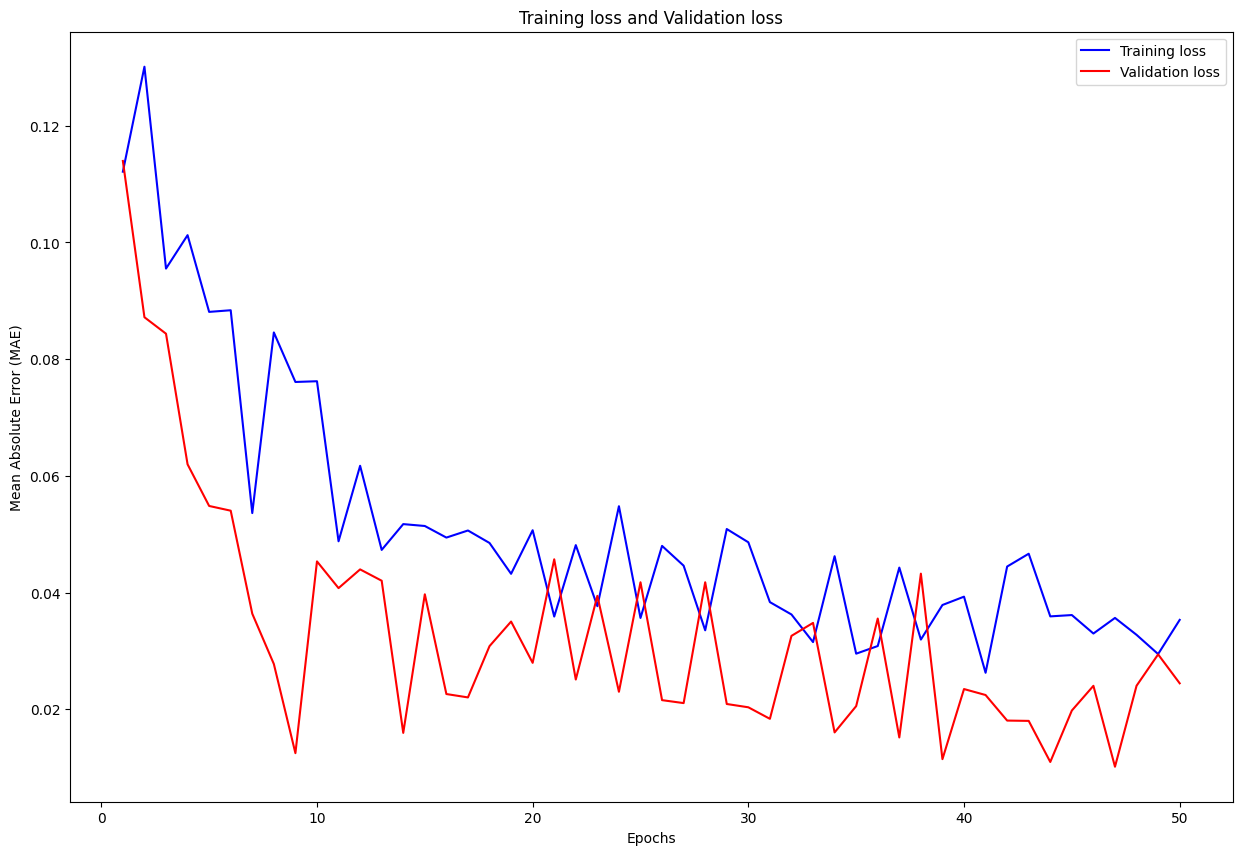

In [ ]:
# Membuat plot loss dan validation loss
import matplotlib.pyplot as plt

# Membuat plot loss dan val_loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(15,10))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training loss and Validation loss')
plt.legend(loc='upper right')
plt.show()

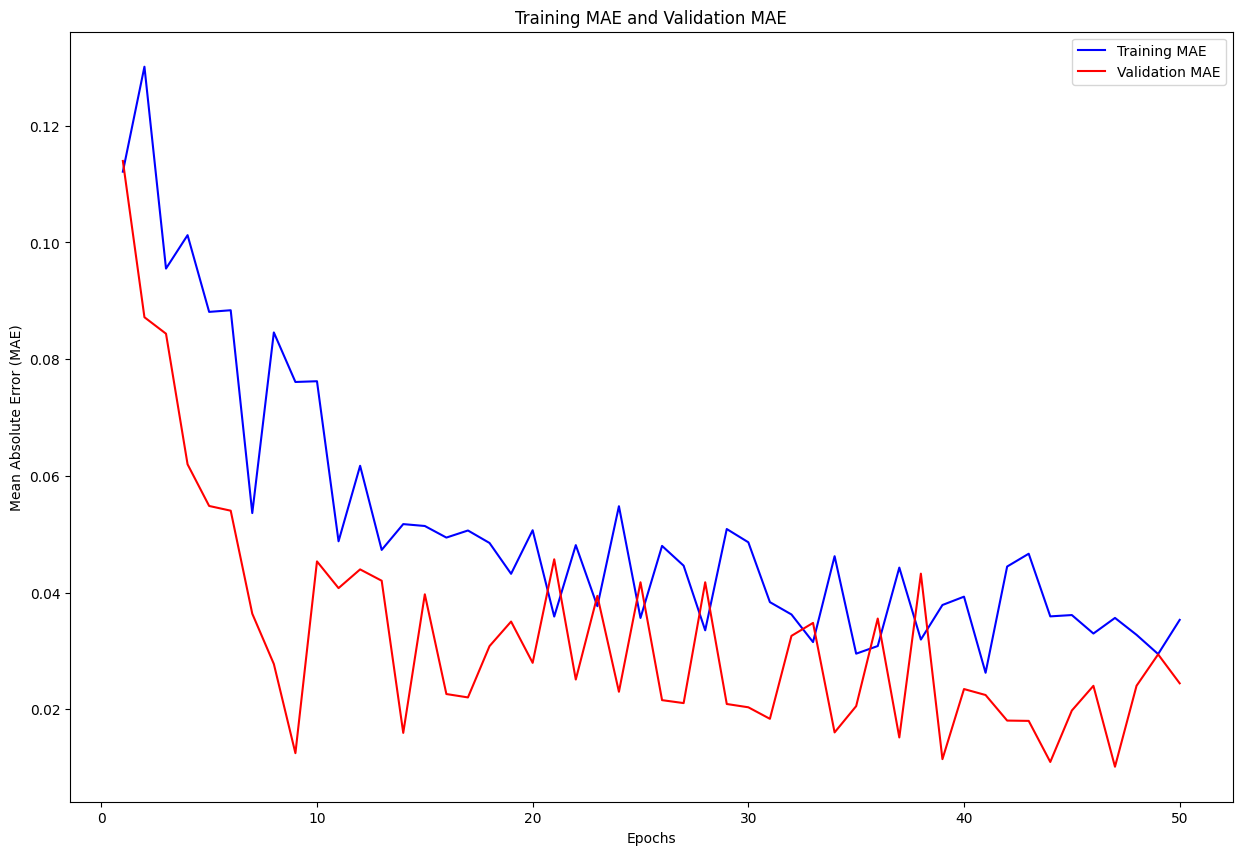

In [ ]:
# Membuat plot train mae dan validation mae
import matplotlib.pyplot as plt

# Membuat plot loss dan val_loss
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae)+1)

plt.figure(figsize=(15,10))
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE and Validation MAE')
plt.legend(loc='upper right')
plt.show()

In [ ]:
evaluation = model.evaluate(data_test, verbose=0)

In [ ]:
metric_names = model.metrics_names

for metric_name, value in zip(metric_names, evaluation):
    print(f'{metric_name}: {round(value, 3)}')

loss: 0.026
mean_absolute_error: 0.026


In [ ]:
y_hat = []

In [ ]:
# Walk forward validation

history = val_df[['close']][-5:].copy().reset_index(drop=True)
test = test_df.copy().reset_index(drop=True)

y_hat.append(model.predict(history[-5:].values.reshape(1,5,1)))

for i in range(len(test)):


  history = pd.concat([history, test.loc[[i], ['close']]], ignore_index=True)
  y_hat.append(model.predict(history[-5:].values.reshape(1,5,1)))

1/1 [==============================] - 0s 23ms/step


In [ ]:
y_hat = [target_scaler.inverse_transform(i) for i in y_hat]

In [ ]:
y_hat = [i.reshape(1,) for i in y_hat]

In [ ]:
y_hat = pd.DataFrame(y_hat, columns=['target'])

In [ ]:
# Make prediction size match with the test data size

y_hat = y_hat.iloc[:-1]

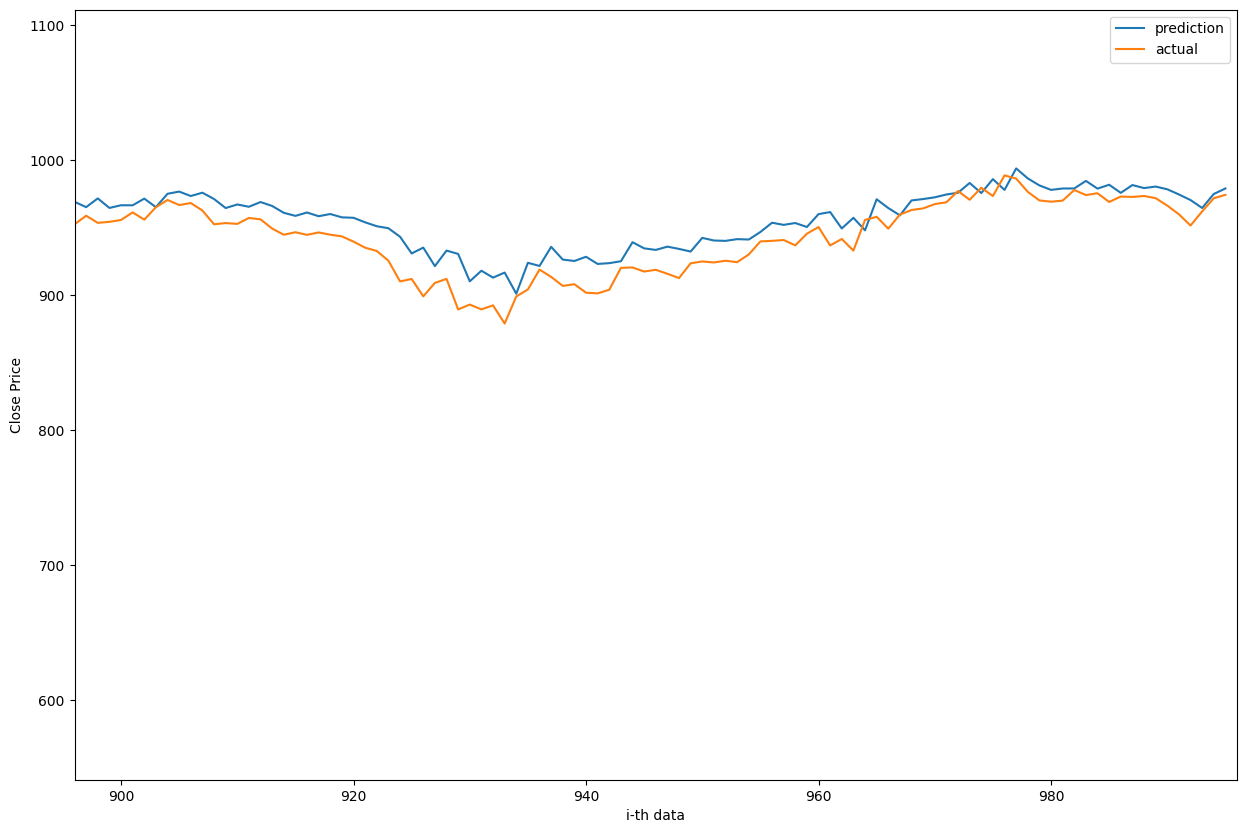

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y='target', x=range(896, 996), data=y_hat, label='prediction') # ini bisa ae 877, 973
sns.lineplot(y='close', x=df.index, data=df, label='actual')
plt.xlabel('i-th data')
plt.ylabel('Close Price')
plt.xlim(896, 996)
plt.show()

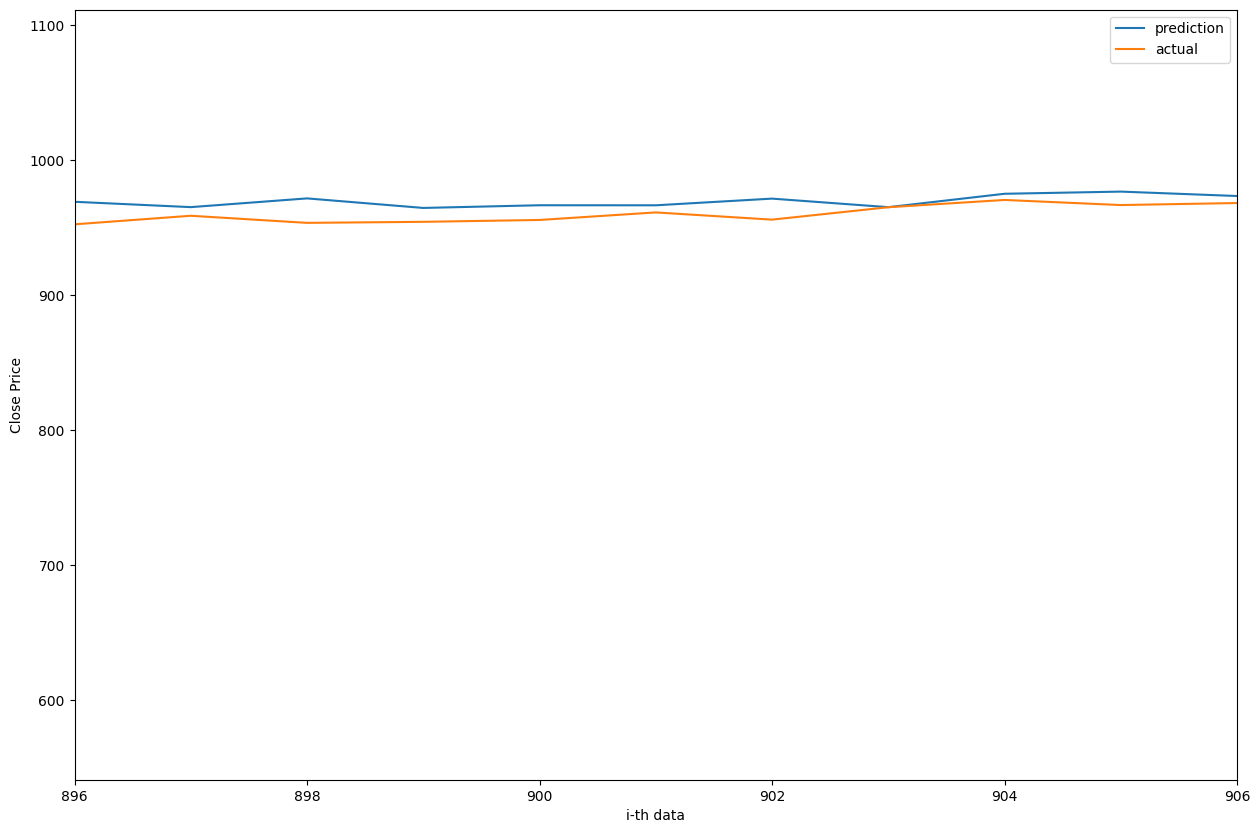

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y='target', x=range(896, 996), data=y_hat, label='prediction') # ini bisa ae 877, 973
sns.lineplot(y='close', x=df.index, data=df, label='actual')
plt.xlabel('i-th data')
plt.ylabel('Close Price')
plt.xlim(896, 906)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(df['close'].iloc[896:], y_hat) # ini bisa aja 877: ama yhat[:-1]

In [ ]:
mae_test

13.425054931640629

In [ ]:
model.save('/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - MODEL WITHOUT NEWS.h5')

# Hyperparameter Tuning Model without News

In [ ]:
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.backend import clear_session

import optuna

In [ ]:
def objective(trial):
  clear_session()

  # parameter for window size
  input_width = trial.suggest_categorical('input_width', [1,5])
  batch_size = trial.suggest_categorical('batch_size', [16, 32])

  # create window data
  data = DataWindow(input_width=input_width, label_width=1, shift=1, label_columns=['target'], batch_size=batch_size)
  data_train = data.train
  data_val = data.val

  # parameter for model
  units = trial.suggest_categorical('units', [50, 100, 200])
  dropout_rate = trial.suggest_float('dropout_rate', 0, 0.5, step=0.1)
  optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  epoch = trial.suggest_categorical('epoch', [50, 100])

  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.001])

  if optimizer == 'adam':
    optimizer_instance = Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    optimizer_instance = SGD(learning_rate=learning_rate)

  # create a model
  model = Sequential()
  model.add(Bidirectional(LSTM(units=units, activation='relu'), input_shape=(input_width, 1)))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(1))

  model.compile(optimizer=optimizer_instance, loss='mae', metrics=['mean_absolute_error'])

  model.fit(
    data_train,
    epochs=epoch,
    validation_data=data_val,
    verbose=False
    )

  score = model.evaluate(data_val)

  return score[1]

In [ ]:
study = optuna.create_study(direction="minimize")

[I 2024-06-03 11:36:13,016] A new study created in memory with name: no-name-6ecc0306-a3d7-4e28-bc49-27b440cdc240


In [ ]:
study.optimize(objective, n_trials=100, timeout=600)

11/11 [==============================] - 0s 5ms/step - loss: 0.0273 - mean_absolute_error: 0.0273


[I 2024-06-03 11:37:28,869] Trial 0 finished with value: 0.027277376502752304 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 50, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 0 with value: 0.027277376502752304.


6/6 [==============================] - 0s 5ms/step - loss: 0.0746 - mean_absolute_error: 0.0746


[I 2024-06-03 11:37:50,706] Trial 1 finished with value: 0.07458049803972244 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 0 with value: 0.027277376502752304.


6/6 [==============================] - 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140


[I 2024-06-03 11:38:14,693] Trial 2 finished with value: 0.014036181382834911 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 2 with value: 0.014036181382834911.


11/11 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101


[I 2024-06-03 11:39:07,814] Trial 3 finished with value: 0.01008610613644123 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.0, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 3 with value: 0.01008610613644123.


11/11 [==============================] - 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111


[I 2024-06-03 11:40:06,364] Trial 4 finished with value: 0.011083155870437622 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 3 with value: 0.01008610613644123.


6/6 [==============================] - 0s 5ms/step - loss: 0.0535 - mean_absolute_error: 0.0535


[I 2024-06-03 11:40:26,404] Trial 5 finished with value: 0.053479552268981934 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 200, 'dropout_rate': 0.2, 'optimizer': 'sgd', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 3 with value: 0.01008610613644123.


6/6 [==============================] - 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601


[I 2024-06-03 11:40:58,283] Trial 6 finished with value: 0.0601448230445385 and parameters: {'input_width': 5, 'batch_size': 32, 'units': 50, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 3 with value: 0.01008610613644123.


6/6 [==============================] - 0s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277


[I 2024-06-03 11:41:17,956] Trial 7 finished with value: 0.027736986055970192 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 100, 'dropout_rate': 0.2, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.01}. Best is trial 3 with value: 0.01008610613644123.


6/6 [==============================] - 0s 5ms/step - loss: 0.0256 - mean_absolute_error: 0.0256


[I 2024-06-03 11:41:36,615] Trial 8 finished with value: 0.02555234543979168 and parameters: {'input_width': 1, 'batch_size': 32, 'units': 50, 'dropout_rate': 0.0, 'optimizer': 'sgd', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 3 with value: 0.01008610613644123.


12/12 [==============================] - 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148


[I 2024-06-03 11:42:37,747] Trial 9 finished with value: 0.014795598573982716 and parameters: {'input_width': 1, 'batch_size': 16, 'units': 50, 'dropout_rate': 0.5, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 3 with value: 0.01008610613644123.


11/11 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125


[I 2024-06-03 11:44:25,398] Trial 10 finished with value: 0.012548843398690224 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.0, 'optimizer': 'sgd', 'epoch': 100, 'learning_rate': 0.01}. Best is trial 3 with value: 0.01008610613644123.


11/11 [==============================] - 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444


[I 2024-06-03 11:46:07,519] Trial 11 finished with value: 0.04437386617064476 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 100, 'learning_rate': 0.001}. Best is trial 3 with value: 0.01008610613644123.


11/11 [==============================] - 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113


[I 2024-06-03 11:47:04,774] Trial 12 finished with value: 0.011295880191028118 and parameters: {'input_width': 5, 'batch_size': 16, 'units': 200, 'dropout_rate': 0.30000000000000004, 'optimizer': 'adam', 'epoch': 50, 'learning_rate': 0.001}. Best is trial 3 with value: 0.01008610613644123.


In [ ]:
trial = study.best_trial

In [ ]:
print("Value: {}".format(trial.value))

Value: 0.01008610613644123


In [ ]:
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Params: 
    input_width: 5
    batch_size: 16
    units: 200
    dropout_rate: 0.0
    optimizer: adam
    epoch: 50
    learning_rate: 0.01


# Use saved model

In [ ]:
from keras.models import load_model

In [ ]:
model_path = '/content/drive/MyDrive/LAMPIRAN SKRIPSI/Tabel dan Data/Model/LAMPIRAN B - MODEL WITHOUT NEWS.h5'
model = load_model(model_path)